In [1]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.models import load_model
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pickle
import pandas as pd

In [2]:
#MACRO DEF

STOCK = 'ONGC.BO'
EPOCHS = 100
model_path = "machine learning model/"+STOCK+"_model.h5"
error_model_path = "machine learning model/"+STOCK+"_error_model.h5"
error_data = "machine learning model/"+STOCK+"_error_data.csv"
START_DATE = '2012-01-01'
END_DATE = '2022-03-05'
PREDICT_DATE = '2022-03-07'
ERR_EPOCHS = 120

In [3]:
#get the stock data
df = web.DataReader(STOCK, data_source='yahoo' , start=START_DATE , end=END_DATE)

#show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,175.266663,170.899994,172.666672,172.366669,183568.0,111.582535
2012-01-03,176.166672,173.166672,174.000000,175.433334,430885.0,113.567741
2012-01-04,178.466660,174.399994,176.066666,177.300003,388765.0,114.776146
2012-01-05,180.100006,174.333328,178.933334,174.866669,603528.0,113.200905
2012-01-06,172.333328,169.033340,171.666672,170.533340,305928.0,113.090355
...,...,...,...,...,...,...
2022-02-25,160.399994,157.000000,159.550003,159.399994,812157.0,159.399994
2022-02-28,161.550003,155.800003,160.899994,160.600006,624125.0,160.600006
2022-03-02,168.350006,161.850006,166.500000,163.050003,1448343.0,163.050003


In [4]:
#get the number of rows and column in the data set
df.shape

(2508, 6)

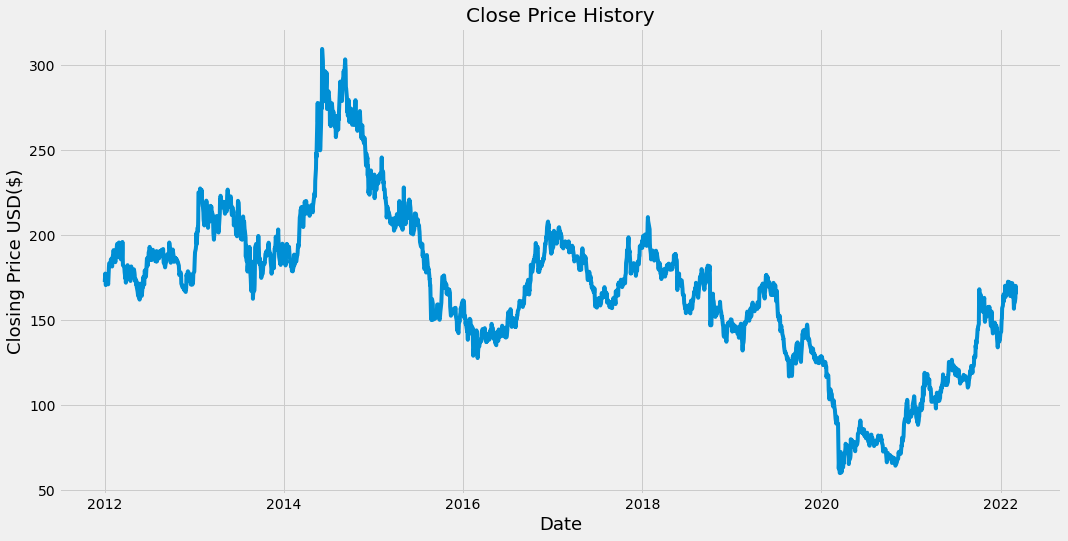

In [5]:
#Visualing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD($)', fontsize=18)
plt.show()

In [6]:
#Create a new data
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2007

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.45055826],
       [0.46286019],
       [0.47034833],
       ...,
       [0.41318446],
       [0.44146554],
       [0.42160857]])

In [8]:
#creating the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.45055826, 0.46286019, 0.47034833, 0.46058701, 0.44320386,
       0.44641301, 0.45818008, 0.45202915, 0.44815133, 0.45376747,
       0.44507587, 0.45911612, 0.47583072, 0.48572572, 0.49455101,
       0.49481844, 0.49508587, 0.48786522, 0.5040449 , 0.49722536,
       0.49682419, 0.48706287, 0.49575447, 0.50966103, 0.51621314,
       0.52570703, 0.51581197, 0.51180047, 0.51180047, 0.50979472,
       0.49722536, 0.50484719, 0.50885868, 0.51139935, 0.53921236,
       0.54068325, 0.53479975, 0.51928861, 0.50979472, 0.5174166 ,
       0.54362503, 0.52891618, 0.51180047, 0.51688168, 0.51220164,
       0.50457976, 0.51554454, 0.50257401, 0.52798021, 0.54496218,
       0.52570703, 0.49000465, 0.48853376, 0.48719661, 0.484656  ,
       0.48305137, 0.47395865, 0.45884869, 0.46847626, 0.44895362])]
[0.45684293689002553]

[array([0.45055826, 0.46286019, 0.47034833, 0.46058701, 0.44320386,
       0.44641301, 0.45818008, 0.45202915, 0.44815133, 0.45376747,
       0.44507587, 0.45911612, 0.47

In [9]:
#Convert the X_train and Y_train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1947, 60, 1)

In [11]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
#train the model
model.fit(x_train, y_train, batch_size=32, epochs=EPOCHS)

Epoch 1/100
61/61 [==============================] - 14s 94ms/step - loss: 0.0215
Epoch 2/100
61/61 [==============================] - 6s 104ms/step - loss: 0.0019
Epoch 3/100
61/61 [==============================] - 6s 92ms/step - loss: 0.0019
Epoch 4/100
61/61 [==============================] - 8s 131ms/step - loss: 0.0017
Epoch 5/100
61/61 [==============================] - 10s 170ms/step - loss: 0.0014
Epoch 6/100
61/61 [==============================] - 10s 172ms/step - loss: 0.0014
Epoch 7/100
61/61 [==============================] - 11s 176ms/step - loss: 0.0013
Epoch 8/100
61/61 [==============================] - 12s 197ms/step - loss: 0.0015
Epoch 9/100
61/61 [==============================] - 10s 161ms/step - loss: 0.0012
Epoch 10/100
61/61 [==============================] - 10s 167ms/step - loss: 0.0012
Epoch 11/100
61/61 [==============================] - 11s 187ms/step - loss: 0.0010
Epoch 12/100
61/61 [==============================] - 11s 180ms/step - loss: 0.0012
Epoch 

61/61 [==============================] - 11s 182ms/step - loss: 2.2137e-04
Epoch 95/100
61/61 [==============================] - 11s 186ms/step - loss: 2.3809e-04
Epoch 96/100
61/61 [==============================] - 12s 193ms/step - loss: 2.5130e-04
Epoch 97/100
61/61 [==============================] - 11s 188ms/step - loss: 2.6237e-04
Epoch 98/100
61/61 [==============================] - 16s 255ms/step - loss: 2.4231e-04
Epoch 99/100
61/61 [==============================] - 15s 253ms/step - loss: 2.7311e-04
Epoch 100/100
61/61 [==============================] - 14s 233ms/step - loss: 2.5888e-04


In [14]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test adn y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
    


In [15]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [16]:
#resahpe the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [17]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#get the root mean squared error (RMSE)
rmse =  np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.741320939359075

C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


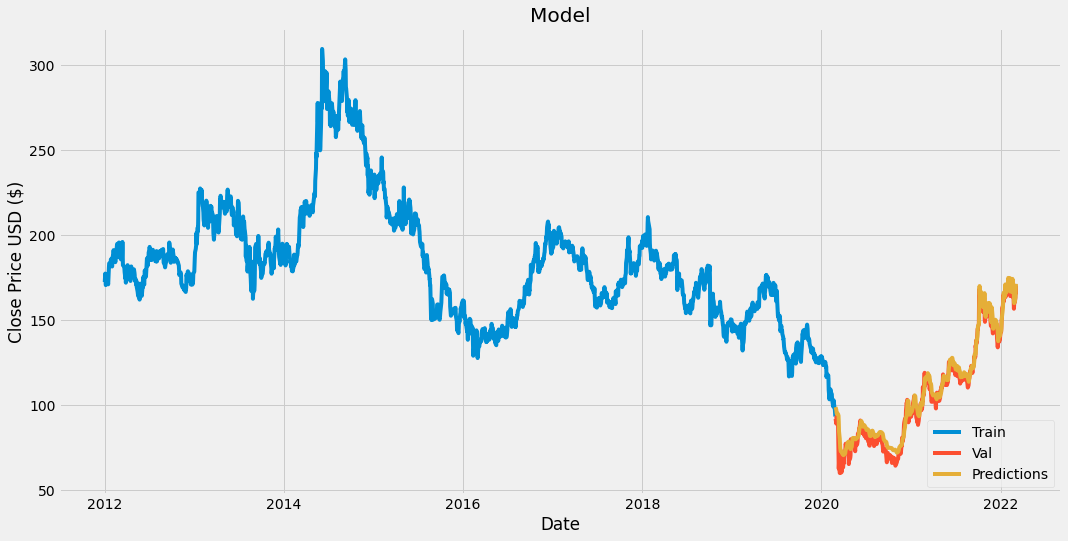

In [19]:
#plot the date
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-02-28,91.949997,98.815544
2020-03-02,89.099998,97.197815
2020-03-03,93.300003,95.480103
2020-03-04,92.849998,94.883842
2020-03-05,92.500000,95.017311
...,...,...
2022-02-25,159.399994,159.928696
2022-02-28,160.600006,161.232315
2022-03-02,163.050003,163.182755


In [21]:
#get the Quote
stock_quote = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=END_DATE)
#create new data frame
new_df = stock_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.fit_transform(last_60_days)
#create the empty list
x_test = []
#append the past 60 days
x_test.append(last_60_days_scaled)
#convert the x_test data set to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[164.0492]]


In [22]:
stock_quote2 = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=PREDICT_DATE)
print(stock_quote2['Close'])

Date
2012-01-02    172.366669
2012-01-03    175.433334
2012-01-04    177.300003
2012-01-05    174.866669
2012-01-06    170.533340
                 ...    
2022-02-28    160.600006
2022-03-02    163.050003
2022-03-03    170.100006
2022-03-04    165.149994
2022-03-07    187.050003
Name: Close, Length: 2509, dtype: float64


In [23]:
model.save(model_path)
loaded_model = load_model(model_path)



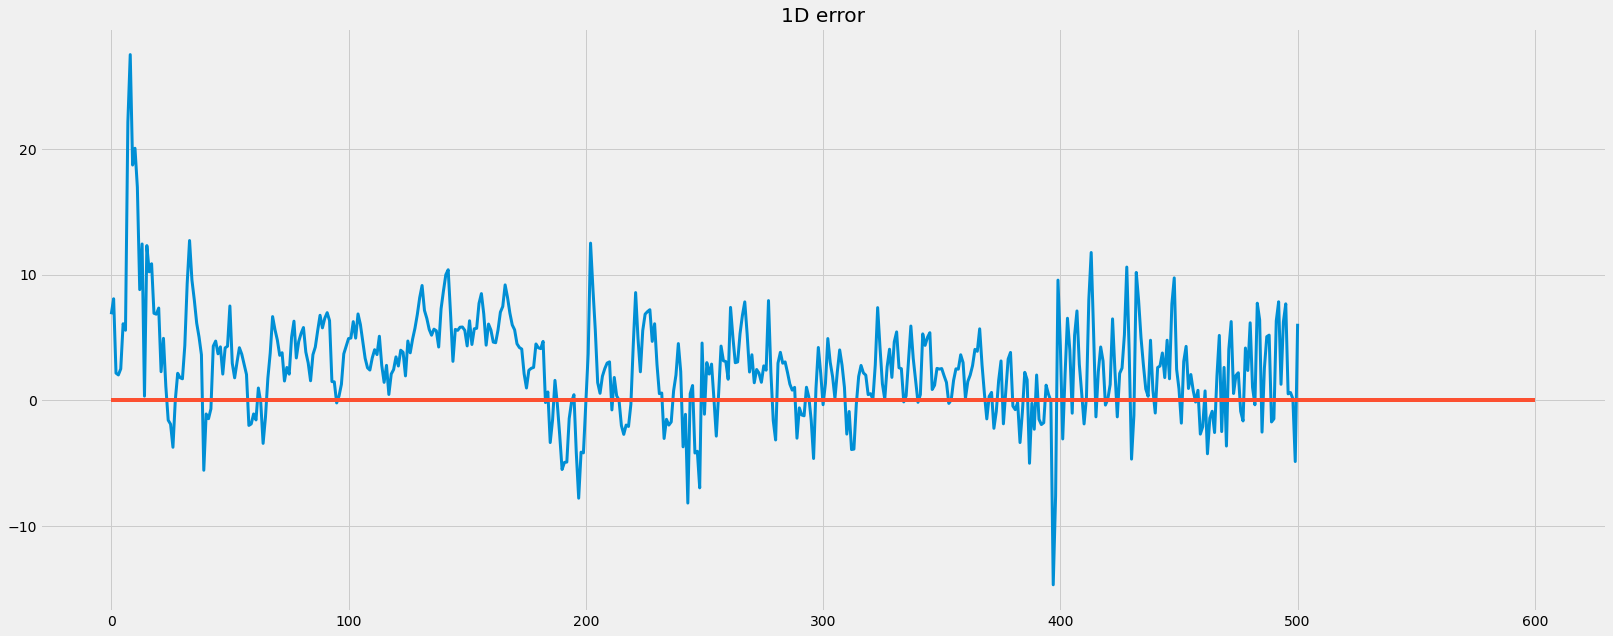

In [24]:
#The Error model
nperr = np.array(predictions - y_test)
nperr.shape
#np.savetxt(error_data,nperr,delimiter=",")
scaled_error = scaler.fit_transform(nperr)
plt.figure(figsize=(25,10))
plt.plot(nperr, linewidth=3)
x = np.linspace(0, 600, 600)
y = np.linspace(0, 0, 600)
plt.plot(x,y)
plt.title("1D error")
plt.show()

In [25]:

nperr.shape
print(type(nperr))
training_errdata_len = math.ceil(len(nperr)*0.8)
training_errdata_len

<class 'numpy.ndarray'>


401

In [26]:
#Scale the error data
errscaler = MinMaxScaler(feature_range=(0,1))
scaled_errdata = errscaler.fit_transform(nperr)


In [27]:
#creating the error training data set
#create the scaled error training data set
train_errdata = scaled_errdata[0:training_errdata_len,:]
#split the data into x_errtrain and y_errtrain data sets
x_errtrain = []
y_errtrain = []
for i in range(60, len(train_errdata)):
    x_errtrain.append(train_errdata[i-60:i,0])
    y_errtrain.append(train_errdata[i,0])
    if i<=61:
        print(x_errtrain)
        print(y_errtrain)
        print()

[array([0.51027594, 0.53946723, 0.39928213, 0.39581747, 0.40727035,
       0.49235553, 0.48012134, 0.87267478, 1.        , 0.7916982 ,
       0.82337584, 0.74985026, 0.55672454, 0.64284206, 0.35575816,
       0.63981433, 0.59034487, 0.6055176 , 0.51208779, 0.51034137,
       0.52198483, 0.40193981, 0.46484831, 0.37432324, 0.31050222,
       0.30289806, 0.25938186, 0.34877427, 0.39890729, 0.39062104,
       0.38852598, 0.45119555, 0.56828025, 0.64933219, 0.57486346,
       0.53729446, 0.49364398, 0.46725098, 0.43387065, 0.21602976,
       0.32216294, 0.31331154, 0.33189235, 0.45020929, 0.4596629 ,
       0.43564816, 0.44876017, 0.39739347, 0.44688073, 0.44996494,
       0.52588839, 0.41788933, 0.39036114, 0.41971907, 0.44714875,
       0.43499246, 0.41539991, 0.39657475, 0.30059642, 0.30345706])]
[0.32225620004988237]

[array([0.51027594, 0.53946723, 0.39928213, 0.39581747, 0.40727035,
       0.49235553, 0.48012134, 0.87267478, 1.        , 0.7916982 ,
       0.82337584, 0.74985026, 0.55

In [28]:
#Convert the X_errtrain and Y_errtrain to numpy arrays
x_errtrain , y_errtrain = np.array(x_errtrain), np.array(y_errtrain)

In [29]:
#Reshape the error data
x_errtrain = np.reshape(x_errtrain,(x_errtrain.shape[0],x_errtrain.shape[1],1))
x_errtrain.shape

(341, 60, 1)

In [30]:
#Building the LSTM error model
errmodel = Sequential()
errmodel.add(LSTM(50, return_sequences=True, input_shape =(x_errtrain.shape[1],1)))

#adding a fourth fifth layer and some Dropout regularistion
errmodel.add(LSTM(units = 50, return_sequences = False))

errmodel.add(Dense(25))
errmodel.add(Dense(1))

In [31]:
#compile the error Model
errmodel.compile(optimizer='adam', loss='mean_squared_error')


In [32]:
#train the error model
errmodel.fit(x_errtrain, y_errtrain, batch_size=32, epochs=ERR_EPOCHS)

Epoch 1/120
11/11 [==============================] - 52s 103ms/step - loss: 0.0610
Epoch 2/120
11/11 [==============================] - 1s 112ms/step - loss: 0.0090
Epoch 3/120
11/11 [==============================] - 1s 100ms/step - loss: 0.0067
Epoch 4/120
11/11 [==============================] - 1s 110ms/step - loss: 0.0058
Epoch 5/120
11/11 [==============================] - 1s 107ms/step - loss: 0.0054
Epoch 6/120
11/11 [==============================] - 1s 105ms/step - loss: 0.0054
Epoch 7/120
11/11 [==============================] - 1s 111ms/step - loss: 0.0054
Epoch 8/120
11/11 [==============================] - 1s 102ms/step - loss: 0.0054
Epoch 9/120
11/11 [==============================] - 1s 101ms/step - loss: 0.0054
Epoch 10/120
11/11 [==============================] - 1s 110ms/step - loss: 0.0054
Epoch 11/120
11/11 [==============================] - 1s 103ms/step - loss: 0.0054
Epoch 12/120
11/11 [==============================] - 1s 102ms/step - loss: 0.0053
Epoch 13/120

11/11 [==============================] - 1s 102ms/step - loss: 0.0043
Epoch 100/120
11/11 [==============================] - 1s 109ms/step - loss: 0.0041
Epoch 101/120
11/11 [==============================] - 1s 118ms/step - loss: 0.0040
Epoch 102/120
11/11 [==============================] - 1s 110ms/step - loss: 0.0040
Epoch 103/120
11/11 [==============================] - 1s 108ms/step - loss: 0.0040
Epoch 104/120
11/11 [==============================] - 1s 118ms/step - loss: 0.0039
Epoch 105/120
11/11 [==============================] - 1s 106ms/step - loss: 0.0040
Epoch 106/120
11/11 [==============================] - 1s 100ms/step - loss: 0.0040
Epoch 107/120
11/11 [==============================] - 1s 117ms/step - loss: 0.0040
Epoch 108/120
11/11 [==============================] - 1s 115ms/step - loss: 0.0038
Epoch 109/120
11/11 [==============================] - 1s 110ms/step - loss: 0.0039
Epoch 110/120
11/11 [==============================] - 1s 107ms/step - loss: 0.0039
Epoch 

In [33]:
#create the testing error data set
#create a new array containing scaled values 
test_errdata = scaled_errdata[training_errdata_len - 60: , :]
#create the data sets x_errtest adn y_errtest
x_errtest = []
y_errtest = nperr[training_errdata_len:,:]
for i in range(60, len(test_errdata)):
    x_errtest.append(test_errdata[i-60:i,0])


In [34]:
#convert the error data to a numpy array
x_errtest = np.array(x_errtest)



In [35]:
#resahpe the error data
x_errtest = np.reshape(x_errtest,(x_errtest.shape[0],x_errtest.shape[1],1))


In [36]:
#get the models predicted error values
errpredictions = errmodel.predict(x_errtest)
errpredictions = errscaler.inverse_transform(errpredictions)

(100, 1)


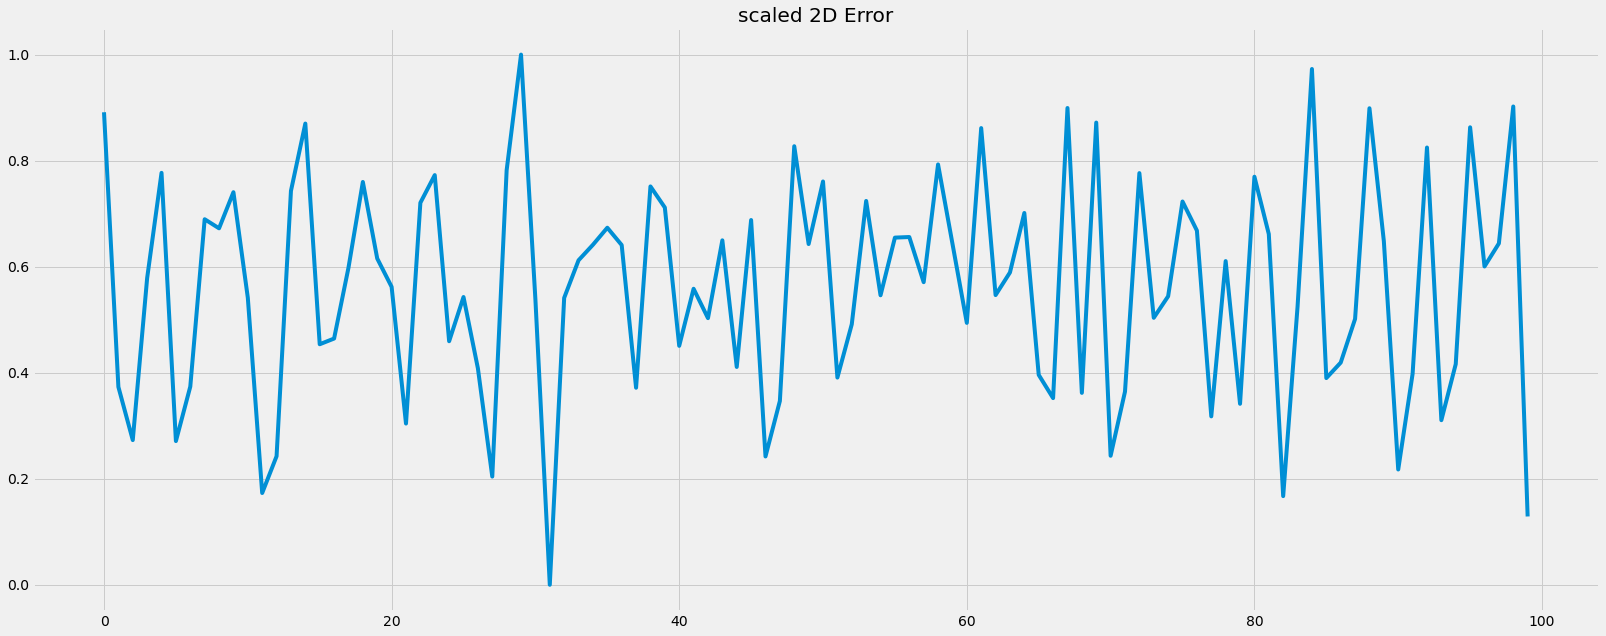

0.20727411336847582


In [37]:
#get the root mean squared error (RMSE)
error2d = []
print(errpredictions.shape)
error2d.append(errpredictions - y_errtest)
nperr2d = np.array(errpredictions - y_errtest)
scaled_error2d = errscaler.fit_transform(nperr2d)
#print(nperr)
plt.figure(figsize=(25,10))
plt.plot(scaled_error2d)
plt.title('scaled 2D Error')
plt.show()
rmse2d =  np.sqrt(np.mean(errpredictions - y_errtest)**2)
print(rmse2d)
#print(errpredictions)

(501, 1)
        Error  Error Predictions   Error2d
401 -3.063889           3.003001  6.066890
402  2.112976          -1.071386 -3.184362
403  6.547607           1.572520 -4.975087
404  3.997589           4.479612  0.482023
405 -1.013733           3.012302  4.026035
..        ...                ...       ...
496  0.528702           6.088991  5.560289
497  0.632309           1.504444  0.872135
498  0.132751           1.782364  1.649613
499 -4.861053           1.400502  6.261555
500  6.109314          -1.438562 -7.547876

[100 rows x 3 columns]


C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


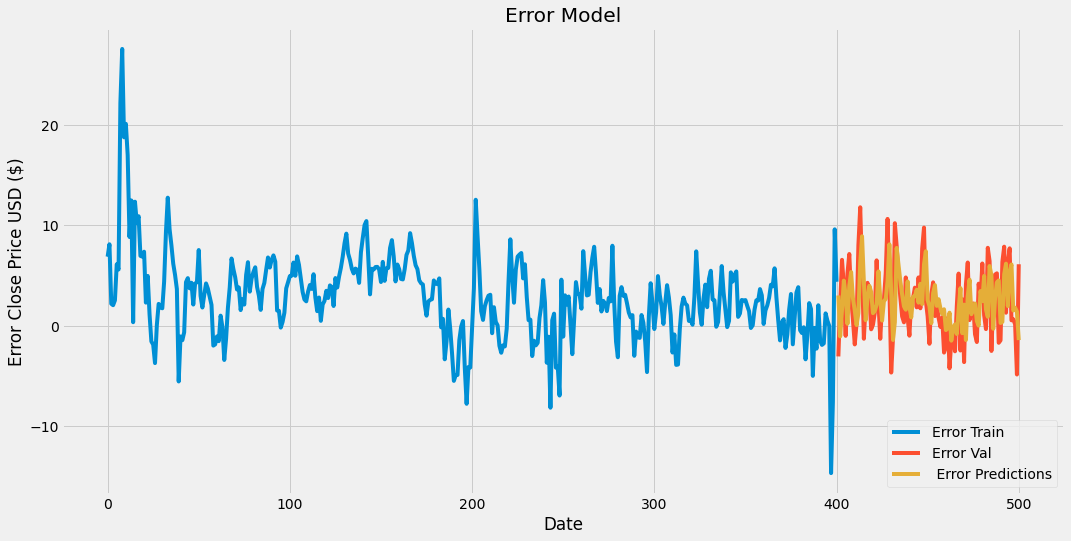

In [38]:
#plot the error data
print(nperr.shape)
dfnperr = pd.DataFrame(nperr, columns = ['Error'])
dfnperr.to_csv(error_data)
errtrain = dfnperr[:training_errdata_len]
errvalid = dfnperr[training_errdata_len:]
errvalid['Error Predictions'] = errpredictions
errvalid['Error2d'] = nperr2d
print(errvalid)
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Error Model')
plt.xlabel('Date')
plt.ylabel('Error Close Price USD ($)')
plt.plot(errtrain['Error'])
plt.plot(errvalid[['Error', 'Error Predictions']])
plt.legend(['Error Train', 'Error Val', ' Error Predictions'], loc='lower right')
plt.show()

In [39]:
#predict the error
last_60_days_error = dfnperr[-60:].values
print(last_60_days_error)

#scale the data to be values between 0 and 1
last_60_days_scaled_error = errscaler.transform(last_60_days_error)


#create the empty list
x_errtest=[]

#append the past 60 days 
x_errtest.append(last_60_days_scaled_error)

#convert the x_test data set to a numpy array
x_errtest = np.array(x_errtest)
x_errtest = np.reshape(x_errtest,(x_errtest.shape[0],x_errtest.shape[1],1))

pred_error = model.predict(x_errtest)

#undo the scaling
pred_error = errscaler.inverse_transform(pred_error)

print(pred_error)

dfnperr.tail()

[[ 2.62181091]
 [ 2.7472229 ]
 [ 3.78108215]
 [ 1.82118225]
 [ 4.79803467]
 [ 1.72674561]
 [ 7.67237854]
 [ 9.76036072]
 [ 2.48672485]
 [ 0.91812134]
 [-1.8049469 ]
 [ 3.11264038]
 [ 4.30786133]
 [ 0.9556427 ]
 [ 2.06687927]
 [ 0.78642273]
 [-0.12498474]
 [ 0.80964661]
 [-2.67874146]
 [-2.08718872]
 [ 0.76333618]
 [-4.24324036]
 [-1.40319824]
 [-0.85900879]
 [-2.55387878]
 [ 1.95004272]
 [ 5.18174744]
 [-2.47563171]
 [ 2.63311768]
 [-3.62797546]
 [ 4.07084656]
 [ 6.28269958]
 [ 0.55558777]
 [ 1.99215698]
 [ 2.20762634]
 [-0.86108398]
 [-1.62931824]
 [ 4.17651367]
 [ 2.38803101]
 [ 6.18424988]
 [ 1.04914856]
 [-0.34320068]
 [ 7.74581909]
 [ 6.4150238 ]
 [-2.51885986]
 [ 2.57637024]
 [ 5.08032227]
 [ 5.20458984]
 [-1.70690918]
 [-1.46270752]
 [ 6.33787537]
 [ 7.85752869]
 [ 1.2883606 ]
 [ 6.25132751]
 [ 7.69515991]
 [ 0.52870178]
 [ 0.63230896]
 [ 0.13275146]
 [-4.86105347]
 [ 6.10931396]]
[[6.484088]]


,Error
496,0.528702
497,0.632309
498,0.132751
499,-4.861053
500,6.109314


In [40]:
print("the predicted value with 1D error correction ")
print(pred_price[0][0]-pred_error[0][0])

the predicted value with 1D error correction 
157.56511


In [41]:
model.save(error_model_path)
loaded_model = load_model(error_model_path)


In [42]:
stock_quote2 = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=PREDICT_DATE)
print(stock_quote2['Close'])

Date
2012-01-02    172.366669
2012-01-03    175.433334
2012-01-04    177.300003
2012-01-05    174.866669
2012-01-06    170.533340
                 ...    
2022-02-28    160.600006
2022-03-02    163.050003
2022-03-03    170.100006
2022-03-04    165.149994
2022-03-07    187.050003
Name: Close, Length: 2509, dtype: float64
